## 課題3-2 回答例

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
rng= np.random.default_rng();

In [3]:
#データ 例：指数分布(母平均beta=1)
pop_mean=1.0
beta=pop_mean
N=100# sample size
x= rng.exponential(scale=beta, size=N); # 観測データ 

In [4]:
B=20000
K= 25
r= np.mean(x) #(この例では統計量Rは標本平均としている)
rbs= np.empty(B)
tbs= np.empty(B)
for j in range(0,B):
    xbs= rng.choice(x, size=N, replace=True) # BS sample of x
    rbs[j]= np.mean(xbs) # BS sample of R (この例では統計量Rは標本平均としている)
    rbsbs= np.empty(K)
    for k in range(0,K):
        xbsbs= rng.choice(xbs, size=N, replace=True)
        rbsbs[k]= np.mean(xbsbs)  # BSBS sample of R (この例では統計量Rは標本平均としている)
    se_rbs= np.std(rbsbs,ddof=1)  # standard error of rbs[j]
    tbs[j]= (rbs[j]-r)/se_rbs # Bootstrap t value
se_r= np.std(rbs,ddof=1) # standard error of r

In [5]:
tbs= np.sort(tbs)
alpha= 0.05
L= int(alpha/2*B)
U= int((1-alpha/2)*B)
tbs_l= tbs[L]
tbs_u= tbs[U]
R_expect_l= r-tbs_u*se_r
R_expect_u= r-tbs_l*se_r
print(R_expect_l,R_expect_u) # Bootstrap t 法の区間推定結果

0.6912221038628781 1.0698442958255145


### 比較参考：正規母集団を仮定した解析的な区間推定

In [6]:
tau_l= stats.t.ppf(q=alpha/2, df=N-1) # t分布の下側境界
tau_u= stats.t.ppf(q=1-alpha/2, df=N-1) # t分布の上側境界
# 信頼水準alphaの母平均の区間推定
x_popmean_low= np.mean(x)-tau_u*np.sqrt(np.var(x,ddof=1)/N)
x_popmean_up= np.mean(x)-tau_l*np.sqrt(np.var(x,ddof=1)/N)
print(x_popmean_low, x_popmean_up)

0.6847193238763434 1.0363127405176662


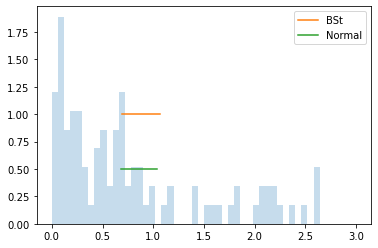

In [7]:
plt.hist(x, bins=50, range=(0,3*beta), density=True, alpha=0.25)
plt.plot([R_expect_l,R_expect_u],[1,1],label="BSt")
plt.plot([x_popmean_low,x_popmean_up],[0.5,0.5],label="Normal")
plt.legend(loc='upper right')